## Dados & Bibliotecas

In [1]:
# Importando as bibliotecas necessárias: 
import numpy as np                      # Algebra linear
import matplotlib.pyplot as plt         # Plotagem de gráficos
import pandas as pd                     # Manipulação de dados

# Para o uso do MinMax
from sklearn.preprocessing import MinMaxScaler

# Configurando a plotagem do gráfico:

%matplotlib inline

In [2]:
# Importando as FEATURES e o TARGET
df = pd.read_csv('training.csv', header=None)

# Definindo o número de amostras:
M = len(df[0].to_numpy())

# Definindo as ENTRADAS (features):
x0 = np.ones((M, 1))
x  = (df[0].to_numpy()).reshape(M,1)

# Defindo o TARGET (saída):
y = (df[1].to_numpy()).reshape(M,1)

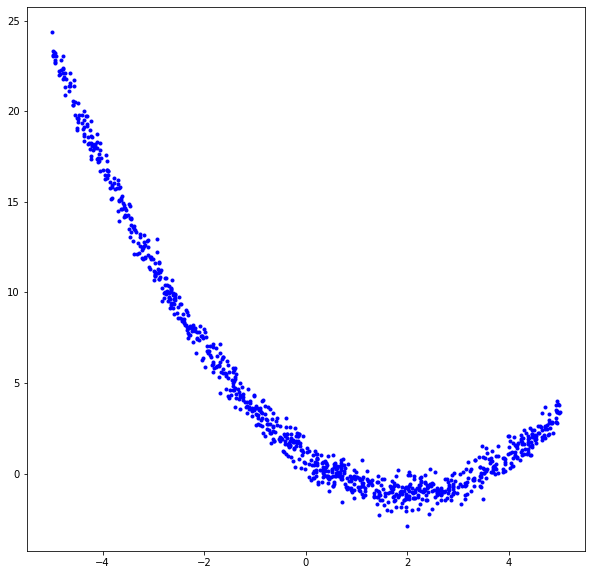

In [3]:
# Plotando a figura:

fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'b.')
plt.show()

## Formula fechada

In [6]:
# Concatenando os valores:
X = np.c_[x0, x]

# Executando a formula fechada:
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = X.dot(a_opt)
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2) )

In [7]:
# Imprimindo os valores encontrados pela FORMULA:
print('O a0 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0, 0]))
print('O a1 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1, 0]))

O a0 ótimo encontrado pela formula fechada é: 4.939361968021296
O a1 ótimo encontrado pela formula fechada é: -1.9593032431040311


## Gradiente descendente

In [84]:
# Definindo o passo de aprendizagem: 
alpha = 0.08

# Criando a matriz de pesos finais para armazenamento:
a = np.zeros((2, 1))

# Definindo os pesos iniciais:
a[0, 0] = -10
a[1, 0] = -10

# Criando a matriz HISTÓRICA dos pesos:
a_hist = np.zeros((2, M+1))

# Criando a matriz de ERROS:
jgd = np.zeros(M+1)

# Definindo o valor INICIAL do erro:
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [85]:
# Definindo o inicio das iterações:
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICOS:
grad_hist = np.zeros((2, M))

In [86]:
# lOOP do gradiente:
while iteration < M:
    
    gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0,0]
    a_hist[1, iteration+1] = a[1,0]
    
    y_hat = a[0, 0] + a[1, 0] * x
    
    jgd[iteration+1] = (1.0/M)*sum(np.power( (y - X.dot(a)) , 2))
    
    iteration += 1

In [87]:
# Imprimindo os valores encontrados pelo GRADIENTE:
print('O valor de a0 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a0 ótimo encontrado pelo gradiente é: 4.939361968021294
O valor de a1 ótimo encontrado pelo gradiente é: -1.9593032431040303


## Plotagem dos resultados

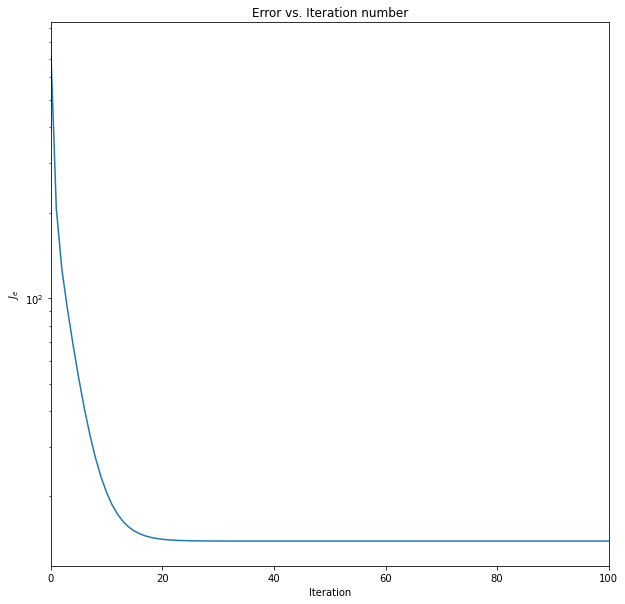

In [97]:
# Plotando o gráfico do ERRO vs NÚMERO DE ITERAÇÕES:

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, 100))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

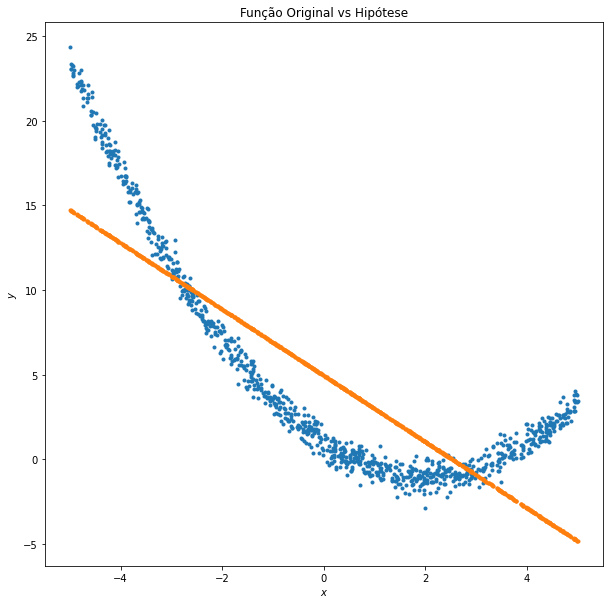

In [92]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, '.')
plt.plot(x, y_hat, '.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Função Original vs Hipótese')

plt.show()